In [ ]:
import pandas as pd
import os

## Data Collection 
Warning: takes around 3-5 minutes to run!

In [2]:
#Getting the data from the CIC website

base_url = "http://cicresearch.ca/IOTDataset/CIC_IOT_Dataset2023/Dataset/CSV/MERGED_CSV/"

dfs = []

# Loop through file numbers 1 to 63
for i in range(1, 11):
    # Create filename with zero padding
    filename = f"Merged{i:02d}.csv"
    url = base_url + filename

    # Read CSV into DataFrame
    df = pd.read_csv(url)

    # Print filename and number of rows
    print(f"Loaded {filename} with {len(df)} rows.")

    # Append to list
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

print("All files loaded and merged!")

Loaded Merged01.csv with 712311 rows.
Loaded Merged02.csv with 748585 rows.
Loaded Merged03.csv with 697289 rows.
Loaded Merged04.csv with 676620 rows.
Loaded Merged05.csv with 744804 rows.
Loaded Merged06.csv with 718229 rows.
Loaded Merged07.csv with 702212 rows.
Loaded Merged08.csv with 712220 rows.
Loaded Merged09.csv with 678882 rows.
Loaded Merged10.csv with 916190 rows.
All files loaded and merged!


## Basic Data Exploration and Pre-Processing

In [3]:
df.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,19.92,6,63.36,25893.962218,0.0,0.0,0.0,0.99,0.99,0.0,...,6421,60,481,64.21,42.100000,64.21,0.000039,100,1772.410000,DDOS-PSHACK_FLOOD
1,0.00,47,64.00,3703.841331,0.0,0.0,0.0,0.00,0.00,0.0,...,57320,98,578,573.20,48.000000,573.20,0.000271,100,2304.000000,MIRAI-GREIP_FLOOD
2,7.92,17,65.91,19673.095685,0.0,0.0,0.0,0.00,0.00,0.0,...,6010,60,70,60.10,1.000000,60.10,0.000057,100,1.000000,DOS-UDP_FLOOD
3,20.40,6,110.50,261.664826,0.1,0.0,0.3,0.20,0.40,0.0,...,2223,54,1500,222.30,451.596686,222.30,0.004766,10,203939.566667,DNS_SPOOFING
4,0.32,1,63.96,28944.199848,0.0,0.0,0.0,0.00,0.01,0.0,...,6006,60,66,60.06,0.600000,60.06,0.000035,100,0.360000,DDOS-ICMP_FLOOD


In [4]:
before = df.shape[0]

# Check for the nulls
print(df.isnull().sum()) # The result was that 95 rows were missing variance

# Drop rows where 'Variance' and 'Std' is missing
df = df.dropna(subset=['Variance'])
df = df.dropna(subset=['Std'])

after = df.shape[0]

Header_Length       0
Protocol Type       0
Time_To_Live        0
Rate                0
fin_flag_number     0
syn_flag_number     0
rst_flag_number     0
psh_flag_number     0
ack_flag_number     0
ece_flag_number     0
cwr_flag_number     0
ack_count           0
syn_count           0
fin_count           0
rst_count           0
HTTP                0
HTTPS               0
DNS                 0
Telnet              0
SMTP                0
SSH                 0
IRC                 0
TCP                 0
UDP                 0
DHCP                0
ARP                 0
ICMP                0
IGMP                0
IPv                 0
LLC                 0
Tot sum             0
Min                 0
Max                 0
AVG                 0
Std                95
Tot size            0
IAT                 0
Number              0
Variance           95
Label               0
dtype: int64


In [5]:
print("Number of Predictors:", len(df.columns) - 1)
print("Number of Targets:", len(set(df['Label'].to_list())))

Number of Predictors: 39
Number of Targets: 34


In [6]:
print(f"Rows before: {before}, Rows after: {after}, Rows dropped: {before - after}")


Rows before: 7307342, Rows after: 7307247, Rows dropped: 95


In [7]:
# Before dropping duplicate rows
print("Before dropping duplicates:", df.shape)

# Drop duplicate rows
df = df.drop_duplicates()

# After dropping duplicate rows
print("After dropping duplicates:", df.shape)

Before dropping duplicates: (7307247, 40)
After dropping duplicates: (4128252, 40)


In [8]:
import numpy as np

# Replace inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)


# Drop rows with NaN
df.dropna(inplace=True)

# Check new shape
print("New shape after removing infinities:", df.shape)




New shape after removing infinities: (4128205, 40)


We've removed duplicates and null rows, now well do EDA.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128205 entries, 0 to 7307337
Data columns (total 40 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Header_Length    float64
 1   Protocol Type    int64  
 2   Time_To_Live     float64
 3   Rate             float64
 4   fin_flag_number  float64
 5   syn_flag_number  float64
 6   rst_flag_number  float64
 7   psh_flag_number  float64
 8   ack_flag_number  float64
 9   ece_flag_number  float64
 10  cwr_flag_number  float64
 11  ack_count        int64  
 12  syn_count        int64  
 13  fin_count        int64  
 14  rst_count        int64  
 15  HTTP             float64
 16  HTTPS            float64
 17  DNS              float64
 18  Telnet           float64
 19  SMTP             float64
 20  SSH              float64
 21  IRC              float64
 22  TCP              float64
 23  UDP              float64
 24  DHCP             float64
 25  ARP              float64
 26  ICMP             float64
 27  IGMP             

Label
DDOS-ICMP_FLOOD            427956
DDOS-UDP_FLOOD             400273
DDOS-SYN_FLOOD             352979
DOS-UDP_FLOOD              350559
DDOS-PSHACK_FLOOD          342435
DDOS-TCP_FLOOD             325343
DDOS-RSTFINFLOOD           281779
DDOS-SYNONYMOUSIP_FLOOD    263093
DOS-TCP_FLOOD              230383
DOS-SYN_FLOOD              217548
BENIGN                     170171
MIRAI-GREETH_FLOOD         151950
MIRAI-UDPPLAIN             134791
MIRAI-GREIP_FLOOD          115547
DDOS-ICMP_FRAGMENTATION     70528
VULNERABILITYSCAN           57893
MITM-ARPSPOOFING            44665
DDOS-ACK_FRAGMENTATION      44507
DDOS-UDP_FRAGMENTATION      44383
DNS_SPOOFING                27354
RECON-HOSTDISCOVERY         20983
RECON-OSSCAN                14914
RECON-PORTSCAN              12538
DOS-HTTP_FLOOD              11174
DDOS-HTTP_FLOOD              4460
DDOS-SLOWLORIS               3669
DICTIONARYBRUTEFORCE         2081
BROWSERHIJACKING              918
SQLINJECTION                  822
COMMANDI

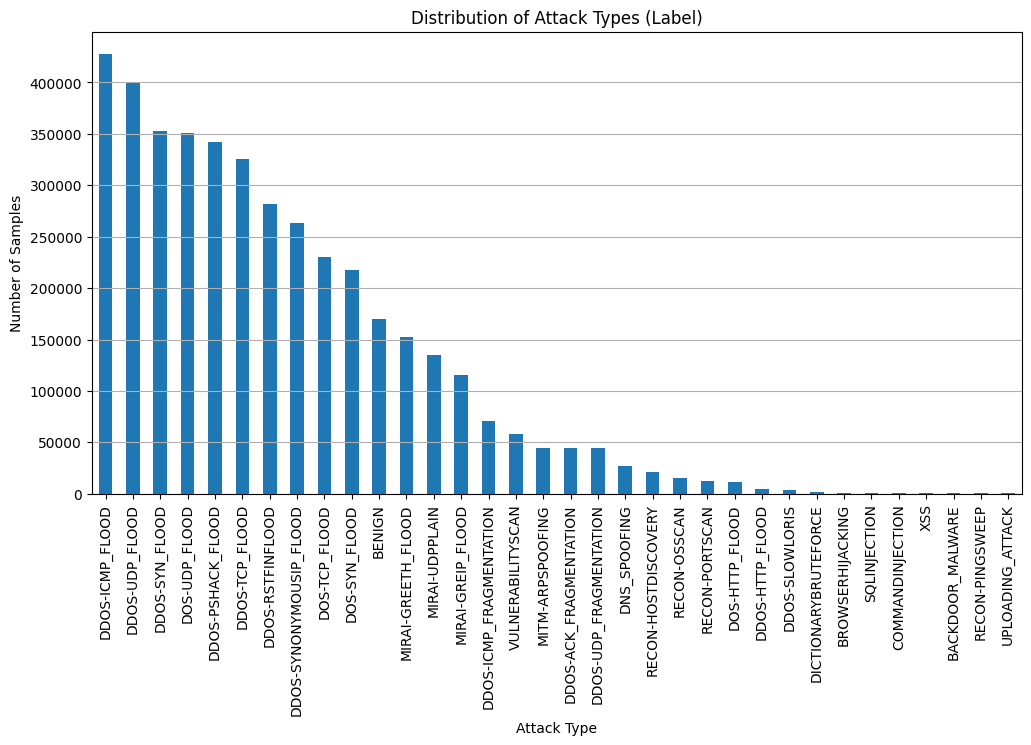

In [10]:
# Count of each attack type
print(df['Label'].value_counts()) # Shows the severe class imbalance

# Plot class distribution
df['Label'].value_counts().plot(kind='bar', figsize=(12,6))

plt.title('Distribution of Attack Types (Label)')
plt.xlabel('Attack Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

<AxesSubplot: ylabel='count'>

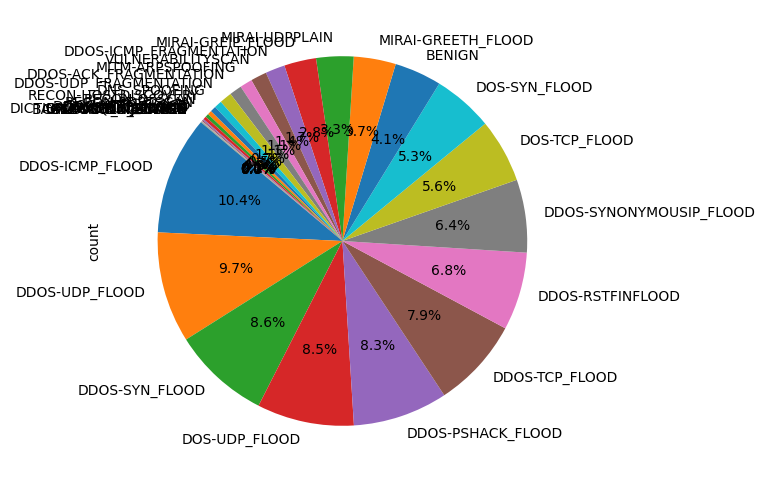

In [11]:
df["Label"].value_counts().plot(kind='pie', figsize=(12,6), autopct='%1.1f%%', startangle=140)

After doing basic data preprocessing, removing null rows and duplicates, we have our cleaned data. After plotting its class densities, we can see that there is a severe class imbalance. To combat this, we can use techniques such as SMOTE and ADASYN. We will test multiple techniques out with multiple models and choose the one that best solves this classification task.

## 1. SMOTE

SMOTE is a technique that synthetically generates new samples for the minority class. After doing some research, we found out that it works well when combined with majority class undersampling.

Original Research Paper: https://arxiv.org/abs/1106.1813  
Article: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/#:~:text=This%20procedure%20can%20be%20used,to%20balance%20the%20class%20distribution.

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

def create_smote_dataset(threshold=1000):
    X = df.drop('Label', axis=1)
    y = df['Label']

    # undersample majority classes down the threshold (defaults at 1000)
    undersample_strategy = { 
        label: threshold for label, count in Counter(y).items() if count > threshold
    }

    smote = SMOTE(sampling_strategy='not majority', random_state=42)
    undersample = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)

    pipeline = Pipeline([
        ('undersample', undersample),
        ('smote', smote)
    ])

    # Apply the pipeline
    X_resampled, y_resampled = pipeline.fit_resample(X, y)

    # Let's check the new class distribution
    print("\nResampled class distribution:")
    print(Counter(y_resampled))

    # You can reconstruct the new DataFrame if needed
    df_smote = pd.DataFrame(X_resampled, columns=X.columns)
    df_smote['Label'] = y_resampled

    # Save to CSV
    df_smote.to_csv(f'../Data/df_smote_{threshold}.csv', index=False)

    return df_smote

### Note
Here, we are first undersampling the majority class down to a particular number of samples. Next, we are using smote to synthetically generate samples up till that same threshold values. For example, DDOS-ICMP_Flood has 40,0000 data values while UPLOADING_ATTACK has around 200 (these are the most and least frequent classes in our data). Through this method we are generating two datasets, one where the threshold is 2500 and another where the threshold is 1000.


Resampled class distribution:
Counter({'BACKDOOR_MALWARE': 2500, 'BENIGN': 2500, 'BROWSERHIJACKING': 2500, 'COMMANDINJECTION': 2500, 'DDOS-ACK_FRAGMENTATION': 2500, 'DDOS-HTTP_FLOOD': 2500, 'DDOS-ICMP_FLOOD': 2500, 'DDOS-ICMP_FRAGMENTATION': 2500, 'DDOS-PSHACK_FLOOD': 2500, 'DDOS-RSTFINFLOOD': 2500, 'DDOS-SLOWLORIS': 2500, 'DDOS-SYNONYMOUSIP_FLOOD': 2500, 'DDOS-SYN_FLOOD': 2500, 'DDOS-TCP_FLOOD': 2500, 'DDOS-UDP_FLOOD': 2500, 'DDOS-UDP_FRAGMENTATION': 2500, 'DICTIONARYBRUTEFORCE': 2500, 'DNS_SPOOFING': 2500, 'DOS-HTTP_FLOOD': 2500, 'DOS-SYN_FLOOD': 2500, 'DOS-TCP_FLOOD': 2500, 'DOS-UDP_FLOOD': 2500, 'MIRAI-GREETH_FLOOD': 2500, 'MIRAI-GREIP_FLOOD': 2500, 'MIRAI-UDPPLAIN': 2500, 'MITM-ARPSPOOFING': 2500, 'RECON-HOSTDISCOVERY': 2500, 'RECON-OSSCAN': 2500, 'RECON-PINGSWEEP': 2500, 'RECON-PORTSCAN': 2500, 'SQLINJECTION': 2500, 'UPLOADING_ATTACK': 2500, 'VULNERABILITYSCAN': 2500, 'XSS': 2500})


<AxesSubplot: ylabel='count'>

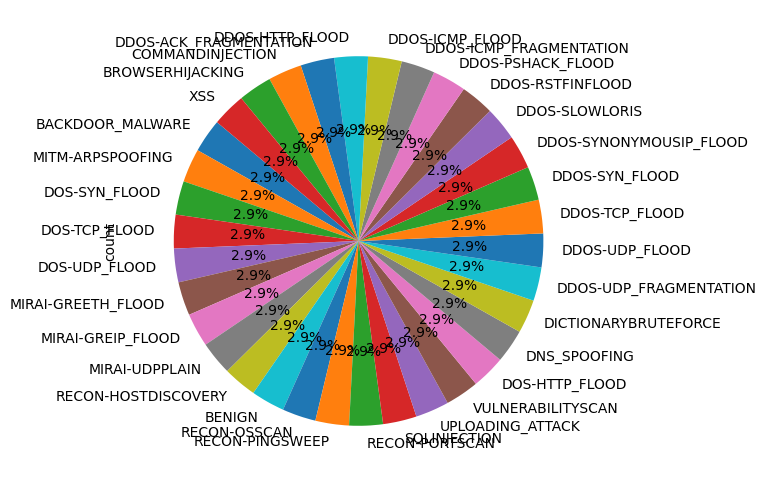

In [21]:
#creating the dataset with threshold=2500
df_smote_2500 = create_smote_dataset(2500)
df_smote_2500["Label"].value_counts().plot(kind='pie', figsize=(12,6), autopct='%1.1f%%', startangle=140)


Resampled class distribution:
Counter({'BACKDOOR_MALWARE': 1000, 'BENIGN': 1000, 'BROWSERHIJACKING': 1000, 'COMMANDINJECTION': 1000, 'DDOS-ACK_FRAGMENTATION': 1000, 'DDOS-HTTP_FLOOD': 1000, 'DDOS-ICMP_FLOOD': 1000, 'DDOS-ICMP_FRAGMENTATION': 1000, 'DDOS-PSHACK_FLOOD': 1000, 'DDOS-RSTFINFLOOD': 1000, 'DDOS-SLOWLORIS': 1000, 'DDOS-SYNONYMOUSIP_FLOOD': 1000, 'DDOS-SYN_FLOOD': 1000, 'DDOS-TCP_FLOOD': 1000, 'DDOS-UDP_FLOOD': 1000, 'DDOS-UDP_FRAGMENTATION': 1000, 'DICTIONARYBRUTEFORCE': 1000, 'DNS_SPOOFING': 1000, 'DOS-HTTP_FLOOD': 1000, 'DOS-SYN_FLOOD': 1000, 'DOS-TCP_FLOOD': 1000, 'DOS-UDP_FLOOD': 1000, 'MIRAI-GREETH_FLOOD': 1000, 'MIRAI-GREIP_FLOOD': 1000, 'MIRAI-UDPPLAIN': 1000, 'MITM-ARPSPOOFING': 1000, 'RECON-HOSTDISCOVERY': 1000, 'RECON-OSSCAN': 1000, 'RECON-PINGSWEEP': 1000, 'RECON-PORTSCAN': 1000, 'SQLINJECTION': 1000, 'UPLOADING_ATTACK': 1000, 'VULNERABILITYSCAN': 1000, 'XSS': 1000})


<AxesSubplot: ylabel='count'>

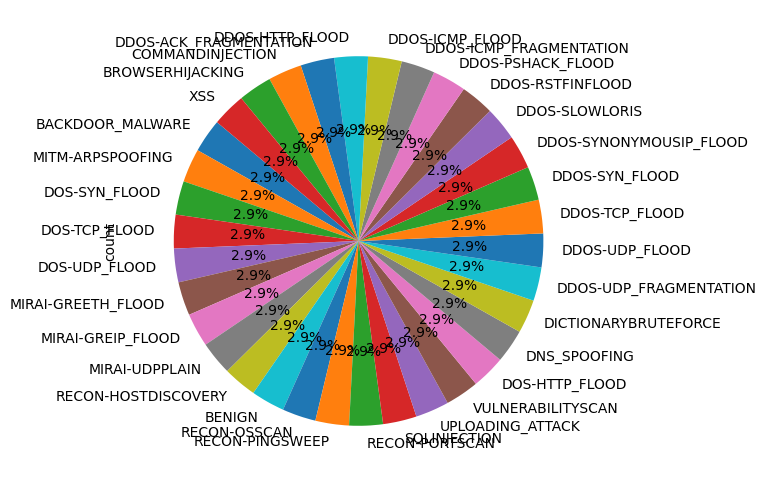

In [22]:
#creating the dataset with threshold=1000
df_smote_1000 = create_smote_dataset(1000)
df_smote_1000["Label"].value_counts().plot(kind='pie', figsize=(12,6), autopct='%1.1f%%', startangle=140)


Resampled class distribution:
Counter({'BACKDOOR_MALWARE': 5000, 'BENIGN': 5000, 'BROWSERHIJACKING': 5000, 'COMMANDINJECTION': 5000, 'DDOS-ACK_FRAGMENTATION': 5000, 'DDOS-HTTP_FLOOD': 5000, 'DDOS-ICMP_FLOOD': 5000, 'DDOS-ICMP_FRAGMENTATION': 5000, 'DDOS-PSHACK_FLOOD': 5000, 'DDOS-RSTFINFLOOD': 5000, 'DDOS-SLOWLORIS': 5000, 'DDOS-SYNONYMOUSIP_FLOOD': 5000, 'DDOS-SYN_FLOOD': 5000, 'DDOS-TCP_FLOOD': 5000, 'DDOS-UDP_FLOOD': 5000, 'DDOS-UDP_FRAGMENTATION': 5000, 'DICTIONARYBRUTEFORCE': 5000, 'DNS_SPOOFING': 5000, 'DOS-HTTP_FLOOD': 5000, 'DOS-SYN_FLOOD': 5000, 'DOS-TCP_FLOOD': 5000, 'DOS-UDP_FLOOD': 5000, 'MIRAI-GREETH_FLOOD': 5000, 'MIRAI-GREIP_FLOOD': 5000, 'MIRAI-UDPPLAIN': 5000, 'MITM-ARPSPOOFING': 5000, 'RECON-HOSTDISCOVERY': 5000, 'RECON-OSSCAN': 5000, 'RECON-PINGSWEEP': 5000, 'RECON-PORTSCAN': 5000, 'SQLINJECTION': 5000, 'UPLOADING_ATTACK': 5000, 'VULNERABILITYSCAN': 5000, 'XSS': 5000})


<AxesSubplot: ylabel='count'>

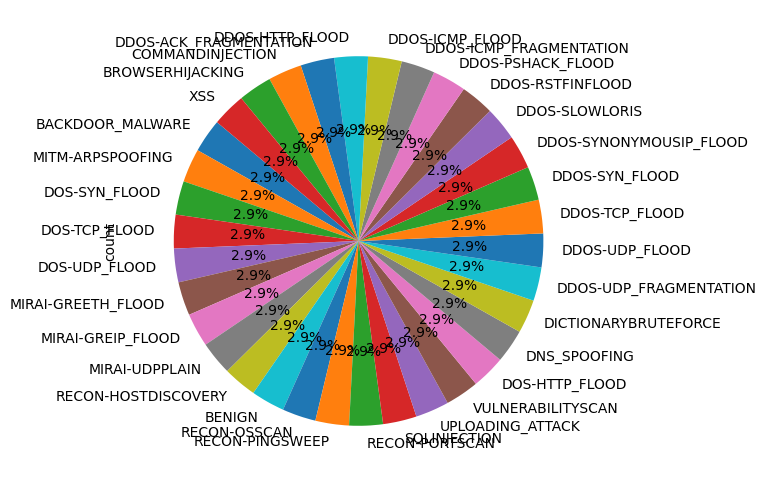

In [ ]:
#creating the dataset with threshold=2500
df_smote_5000 = create_smote_dataset(5000)
df_smote_5000["Label"].value_counts().plot(kind='pie', figsize=(12,6), autopct='%1.1f%%', startangle=140)

We also wanted to create a control dataset that just did random undersampling to a threshold of 5000. This would help to show whether our strategies worked well or not. 

In [25]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

def create_undersampled_dataset(threshold=1000):
    X = df.drop('Label', axis=1)
    y = df['Label']

    undersample_strategy = {
        label: threshold for label, count in Counter(y).items() if count > threshold
    }

    undersample = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)

    pipeline = Pipeline([
        ('undersample', undersample)
    ])

    # apply the undersampling
    X_resampled, y_resampled = pipeline.fit_resample(X, y)

    df_under = pd.DataFrame(X_resampled, columns=X.columns)
    df_under['Label'] = y_resampled

    df_under.to_csv(f'../Data/df_under_{threshold}.csv', index=False)

    return df_under

<AxesSubplot: ylabel='count'>

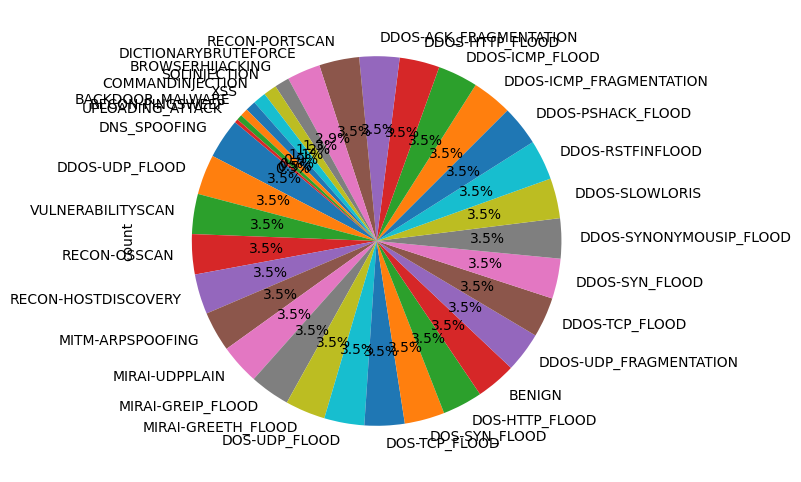

In [26]:
df_under_2500 = create_undersampled_dataset(threshold=2500)
df_under_2500["Label"].value_counts().plot(kind='pie', figsize=(12,6), autopct='%1.1f%%', startangle=140)